<a href="https://colab.research.google.com/github/RC-RX-DEV-AUX/DataScienceCourseFullLabs/blob/main/Aulas_160_161_fuzzyLogicModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install -U scikit-fuzzy

In [33]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [34]:
crises = ctrl.Antecedent(np.arange(0, 101, 1), 'crises')
saba = ctrl.Antecedent(np.arange(0, 101, 1), 'saba')
debito_expiatorio = ctrl.Antecedent(np.arange(0, 101, 1), 'debito_expiatorio')
gravidade = ctrl.Consequent(np.arange(0, 101, 1), 'gravidade')

In [35]:
crises.automf(names = ['semanal','diario','continuo'])
saba.automf(names = ['semanal','diario','continuo'])
debito_expiatorio.automf(names = ['50-80','33-55','menos_33'])
gravidade.automf(names = ['moderada','aguda_grave','risco_vida'])

In [36]:
crises['semanal'] = fuzz.trapmf(crises.universe,[0,0,30,50])
crises['diario'] = fuzz.trapmf(crises.universe,[30,50,70,90])
crises['continuo'] = fuzz.trapmf(crises.universe,[80,90,100,100])

saba['semanal'] = fuzz.trapmf(saba.universe,[0,0,20,40])
saba['diario'] = fuzz.trapmf(saba.universe,[20,40,60,80])
saba['continuo'] = fuzz.trapmf(saba.universe,[80,90,100,100])

debito_expiatorio['50-80'] = fuzz.trapmf(debito_expiatorio.universe,[0,0,20,40])
debito_expiatorio['33-55'] = fuzz.trapmf(debito_expiatorio.universe,[20,40,60,80])
debito_expiatorio['menos_33'] = fuzz.trapmf(debito_expiatorio.universe,[80,90,100,100])

gravidade['moderada']     = fuzz.trimf(gravidade.universe,[0,30,60])
gravidade['aguda_grave']  = fuzz.trimf(gravidade.universe,[30,60,85])
gravidade['risco_vida']   = fuzz.trimf(gravidade.universe,[90, 100, 100])

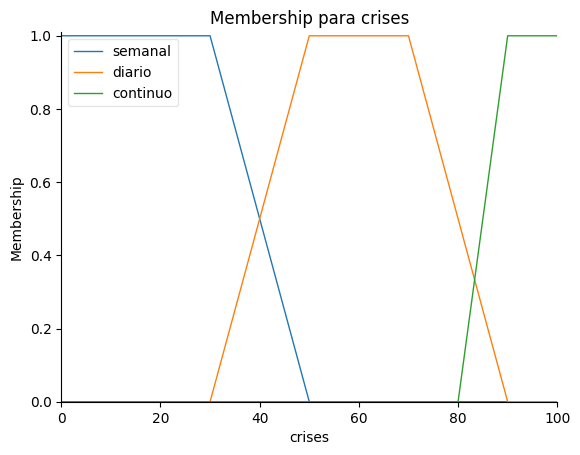

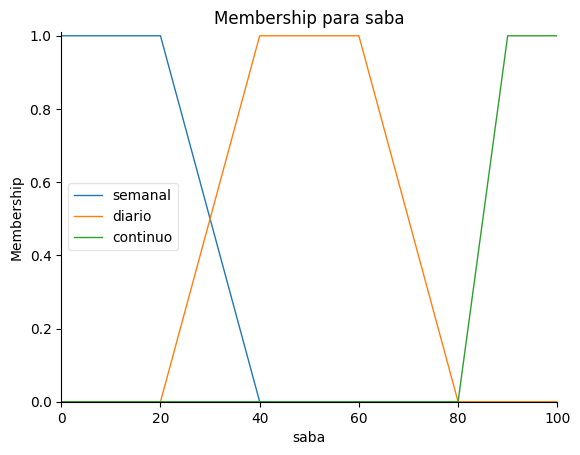

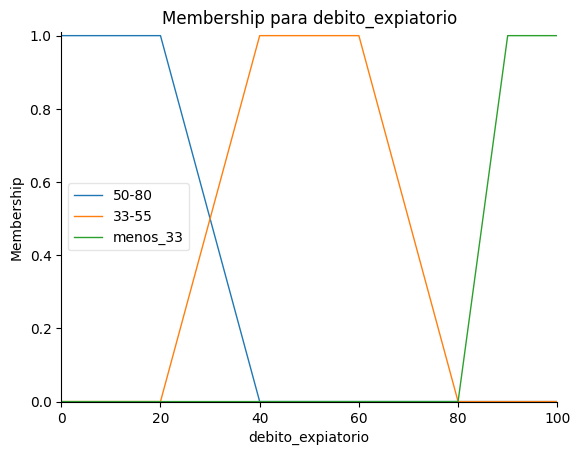

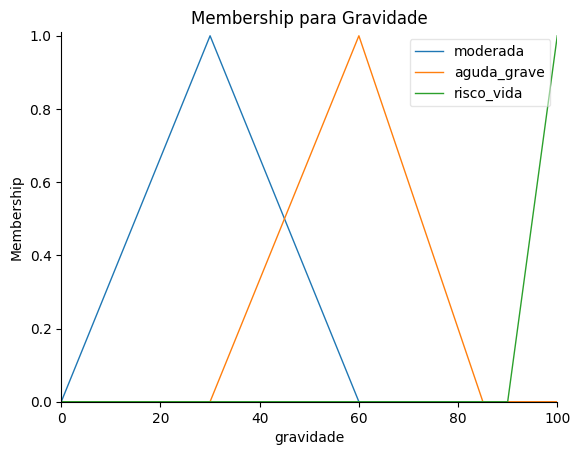

In [37]:
crises.view()
plt.title("Membership para crises")
plt.show()


saba.view()
plt.title("Membership para saba")
plt.show()


debito_expiatorio.view()
plt.title("Membership para debito_expiatorio")
plt.show()

gravidade.view()
plt.title("Membership para Gravidade")
plt.show()

<h1>
  <strong>
    <mark>
        Aula 161 criaçao do modelo e das regras e inferencias
    </mark>
  </strong>
</h1>
<p>

  <button type = "reset">Reset</button>
<!--<form>
  <textarea rols = "15" cols = "40">
    Aula 161, Criando o Modelo, as regras e aferindo, a internet caiu por conta do tempo
  </textarea>-->
  
<!--</form>-->

<form>
  <textarea rows = '20' cols = '40'>
        Aula 161, criaçao de do modelo e criaçao das regras e inferiçao
  </textarea>
  <button type = 'reset'>Reset</button>
</form>
</p>

In [38]:
rule1 = ctrl.Rule(crises['semanal'] | saba['semanal'] | debito_expiatorio['50-80'], gravidade['moderada'])
rule2 = ctrl.Rule(crises['diario'] | saba['diario'] | debito_expiatorio['33-55'], gravidade['aguda_grave'])
rule3 = ctrl.Rule(crises['continuo'] | saba['continuo'] | debito_expiatorio['menos_33'], gravidade['risco_vida'])

In [39]:
asma_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
asma_mod_obj = ctrl.ControlSystemSimulation(asma_ctrl)

In [43]:
asma_mod_obj.input['crises'] = 95 #70 #30
asma_mod_obj.input['saba'] = 95 #80 #40
asma_mod_obj.input['debito_expiatorio'] = 100 #90

asma_mod_obj.compute()

resultado_gravidade = asma_mod_obj.output['gravidade']

print('gravidade da asma: ', resultado_gravidade)


if 0 <= resultado_gravidade < 60:
  print('Gravidade eh Moderada')
elif 60<= resultado_gravidade < 90:
  print('Gravidade aguda grave')
else:
  print('Gravidade Risco de Vida')

gravidade da asma:  96.66666666666663
Gravidade Risco de Vida
